In [19]:
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import Estimator
from qiskit_algorithms import VQE
from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms.optimizers import SPSA, ADAM
import numpy as np
import matplotlib.pyplot as plt

In [20]:
num_qubits = 1 
ansatz = TwoLocal(num_qubits, 'ry', 'cz')
optimizer = ADAM(maxiter=1000)
# ansatz.decompose().draw("mpl")

In [21]:
estimator = Estimator()
vqe = VQE(estimator, ansatz, optimizer)

/var/folders/79/zdv5htt15x92kt2dpnpnz09m0000gn/T/ipykernel_58033/2449948782.py:1: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


In [22]:
E1 = 0.0
E2 = 4.0

V11 = 3.0
V22 = -3.0
V12 = V21 = 0.2

H0 = np.array([[E1, 0],
               [0, E2]])

HI = np.array([[V11, V12],
              [V21, V22]])

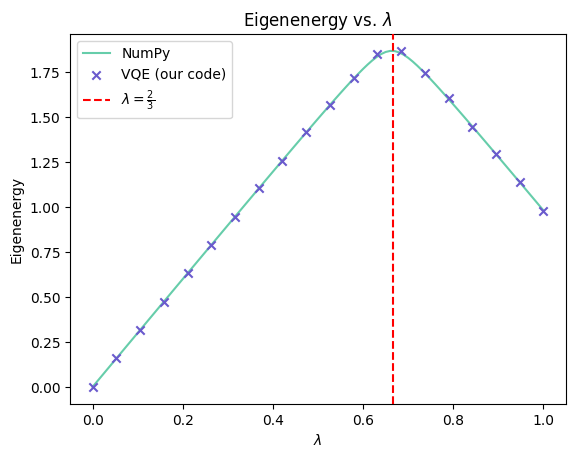

In [23]:
def problem_c() -> None:
    numpy_data = np.genfromtxt("output/np_simple_1_qubit.csv", delimiter=",", skip_header=1)

    lambdas_np = numpy_data[:, 0]
    lower_eigs_np = numpy_data[:, 1]

    # COMMENT BACK IN WHEN 1-QUBIT VQE DATA IS GENERATED
    our_code_data = np.genfromtxt("output/simple_1_qubit_new.csv", delimiter=",", skip_header=1)

    lambdas_our_code = our_code_data[:, 0]
    lower_eigs_our_code = our_code_data[:, 1]

    # make plot and place points on top
    plt.plot(lambdas_np, lower_eigs_np, label="NumPy", color="mediumaquamarine", zorder=1)
    plt.scatter(lambdas_our_code, lower_eigs_our_code, label="VQE (our code)", marker="x", c="slateblue", zorder=2)
    plt.axvline(x=2/3, color='r', linestyle='--', label=r"$\lambda = \frac{2}{3}$", zorder=3)
    plt.title(r"Eigenenergy vs. $\lambda$")
    plt.xlabel(r"$\lambda$")
    plt.ylabel("Eigenenergy")
    plt.legend()
    plt.savefig("images/problem_c_our_code_vs_numpy.png")
    plt.show()

    # previous plot starts here, Qiskit VQE results only
    # lambdas = np.linspace(0, 1, 101)

    # lower_eig = []

    # for lmbda in lambdas:
        
    #     H2_op = SparsePauliOp.from_operator(H0 + lmbda*HI)

    #     minresult = vqe.compute_minimum_eigenvalue(H2_op)
    #     lower_eig.append(minresult.eigenvalue)
    #     print(minresult.eigenvalue)
     

    # plt.plot(lambdas, lower_eig)
    # plt.axvline(x=2/3, color='r', linestyle='--', label=r"$\lambda = \frac{2}{3}$")
    # plt.title(r"Eigenenergy vs. $\lambda$")
    # plt.xlabel(r"$\lambda$")
    # plt.ylabel("Eigenenergy")
    # plt.legend()
    # plt.savefig("images/problem_c.png")
    # plt.show()

problem_c()